# Phase 1

Each grouped wrote print("Hello Iris!") statement
_______________________________________________________________________________________________________________________________________________________

In [12]:
# Madeline
print("Hello Iris!")

Hello Iris!


In [13]:
#Mashfika 
print("Hello Iris!")

Hello Iris!


In [14]:
# Yisihaq
print("Hello Iris!")

Hello Iris!


### Reflection for Phase 1
We learned how to push and pull in GitHub

# Phase 2

In phase 3, we:

- Define variables representing the iris datset size
- Use if/else statements to classify petal lengths
- Iterate through a list of species with a for loop
- Create a function to classify flowers as small, medium, or large

This helps us practice Python fundamentals and prepare for working with dataset methodically
_______________________________________________________________________________________________________________________________________________________

In [15]:
# Variables of iris dataset
n_rows = 150
n_columns = 5

In [16]:
# Control structure: checking the petal length using if/else statements
petal_length = 1.4

if petal_length > 1.5:
    print("Large petal")
else:
    print("Small petal")

Small petal


In [17]:
# Iterating through a list of species using loops
species = ["Sertosa", "Versicolor", "Virginica"]
for flower in species:
    print("Species:", flower)

Species: Sertosa
Species: Versicolor
Species: Virginica


In [18]:
# Using function to return samll, medium, and large for petal and sepal length
def classify_flower(sepal_length, petal_length):
    if petal_length < 2 or sepal_length <2: 
        return "small"
    elif petal_length <5 or sepal_length < 5:
        return "medium" 
    else: 
        return "large" 
example = classify_flower(3,2)
print(example)
    

medium


### Reflection for Phase 2

Key takeaways:

- Understanding how to classify data programmatically using `if/else`.  
- Iterating through lists using loops to process multiple items efficiently.  
- Writing functions that take inputs and return classifications, which helps modularize code.

# Phase 3

In Phase 3, we:

- Load the raw Iris dataset and assign column headers
- Create a summary of the raw dataset with row counts, min, max, and mean
- Check for missing values and duplicates rows
- Clean the dataset by removing empty or duplicate rows and filling the missing numeric values with column means
- Create a summary of cleaned dataset and save it as a .csv file
- Create a summary of cleaned dataset with row counts, min, max, and max

This helps us ensure the dataset is clean and ready for analysis.
_______________________________________________________________________________________________________________________________________________________

Step 1: Loading in the dataset and defining the headers

In [32]:
# Importing libraries
import statistics
import pandas as pd

# Loading in the dataset
df = pd.read_csv("iris.data", header=None, delimiter=",")

# Defining the headers
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

# Displaying the first 5 rows of the dataset
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Creating a summary of the raw dataset with counts, min, max, and mean

In [18]:
# Creating a summary of the original dataset
header = df.columns
numeric_cols = header[:-1] # Select all of the columns except for the last one
rows = df.values.tolist() # Converting the dataframe into a list of lists


numeric_data = {col: [] for col in numeric_cols} # Dictionary comprehension to store the numeric data

for row in rows: # Goes through each row
    for i, col in enumerate(numeric_cols): # Goes through each column index and name in the column section
        try: # Try to turn it into a float
            numeric_data[col].append(float(row[i])) # If it works, it is added to the column list
        except ValueError: 
            continue # continue to the next if it does not work

    
# Creating the information to be used in our 'unclean' summary file
# Includes each column name, and the min, max and mean values for that column
summary_txt = f"Row count: {len(rows)}\n\n"
for col, values in numeric_data.items(): 
        summary_txt += ( 
            f"Column: {col}\n"
            f" Min: {min(values):.2f}\n"
            f" Max: {max(values):.2f}\n"
            f" Mean: {statistics.mean(values):.2f}\n\n"
)

# Creating a summary using the unclean data (just in case we need it)
with open('summary.txt', 'w') as f: 
    f.write(summary_txt) 
print("summary.txt created")

summary.txt created


Step 3: Checking for missing values and duplicates rows

In [19]:
# Checking for what needs to be cleaned

print("Null Values Per Column:") # Printing the null values (if any)
display(df.isnull().sum())

dupes = df[df.duplicated(keep=False)] # Finding the duplicate rows
print("\nDuplicate Rows:")
display(dupes) # Printing the duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}") # Printing the number of duplicated rows

Null Values Per Column:


Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64


Duplicate Rows:


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica



Number of duplicate rows: 3


Step 4: Cleaning the dataset by removing empty or duplicate rows and filling the missing numeric values with column means

In [20]:
# Cleaning dataset
df.dropna(how='all', inplace=True) # Drap rows where all values are missing 

df.drop_duplicates(inplace=True) # Remove any duplicate rows

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') # Converts 'numeric_cols' to numeric types 

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean()) # Fill any missing values with the column's mean

df.to_csv('iris_cleaned.csv', index=False) # Saved the cleaned DataFrame to a new CSV file
print("iris_cleaned.csv saved!")

iris_cleaned.csv saved!


Step 5: Creating a summary of cleaned dataset and saving the cleaned dataset as a .csv file

In [21]:
# Creating the cleaned data summary
summary_clean = f"Row count: {len(df)}\n\n"

# Creating the information to be used in our 'clean' summary file
# Includes each column name, and the min, max and mean values for that column
for col in numeric_cols: 
    summary_clean += (
        f"Column: {col}\n"
        f"  Min: {df[col].min():.2f}\n"
        f"  Max: {df[col].max():.2f}\n"
        f"  Mean: {df[col].mean():.2f}\n"
) 

# Creating the new file
with open('clean_summary.txt', 'w') as f:
    f.write(summary_clean)

# Verifying that the file was created without any errors
print("clean_summary.txt created")

clean_summary.txt created


### Reflection for Phase 3

Key takeaways: 

- Learned how to load raw datasets and assign meaningful column headers.  
- Identified and handled missing data and duplicates, which is crucial for accurate analysis.  
- Practiced converting data types and filling missing values to ensure the dataset is clean.  
- Created summaries of both raw and cleaned data to verify correctness.  

# Phase 4

In Phase 4, we: 
- analyze the Iris dataset
- categorize flowers based on petal length
- computer summary statistics
- create group-based summaries
- visualize the data with histograms, bar charts, boxplots, and scatter plots

This helps us understand which features are most useful for distinguishing species.
_______________________________________________________________________________________________________________________________________________________

Step 1: Loading the cleaned dataset into a DataFrame

In [22]:
import matplotlib.pyplot as plt

# Loading in the cleaned dataset
df = pd.read_csv("iris_cleaned.csv")

# Display the first few rows to make sure it loaded in correctly
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Finding the total count of each species

In [23]:
# Get the unique species
species_list = df['Species'].unique()

# Initialize a counter list for each species
counts = [0] * len(species_list)

# Loop through each flower and accumulate the correct species list
for s in df['Species']:
    for i, species in enumerate(species_list):
        if s == species:
            counts[i] += 1

# Print the counts for each species
for species, count in zip(species_list, counts):
    print(f"{species}: {count}")

Iris-setosa: 48
Iris-versicolor: 50
Iris-virginica: 49


Step 3: Creating a function to categorize petal length and creating a new column with the information

In [24]:
# Define a function to categorize petal length
def categorize_petal_length(length):
    if length < 2:
        return "Short Petal"
    elif 2 <= length <= 5:
        return "Medium Petal"
    else:
        return "Long Petal"

# Apply the function to create a new column
df['Petal_Category'] = df['Petal_Length'].apply(categorize_petal_length)

# Display petal lengths alongside their categorization
df[['Petal_Length', 'Petal_Category']]

,Petal_Length,Petal_Category
0,1.4,Short Petal
1,1.4,Short Petal
2,1.3,Short Petal
3,1.5,Short Petal
4,1.4,Short Petal
...,...,...
142,5.2,Long Petal
143,5.0,Medium Petal
144,5.2,Long Petal
145,5.4,Long Petal


Step 4: Calculating and displaying the summary statistics of the numeric columns

In [25]:
#compute summary statistics 
stats = df[numeric_cols].agg(['mean','median', 'min', 'max'])
stats

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
mean,5.856463,3.055782,3.780272,1.208844
median,5.800000,3.000000,4.400000,1.300000
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


Step 5: Calculating and Displaying the summary statistics, but grouping them by species

In [26]:
# compute average sepal and petal measurements for each species using group stats
group_stats = df.groupby('Species')[numeric_cols].mean()
group_stats

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


Step 6: Creating a histogram for the petal lengths overall

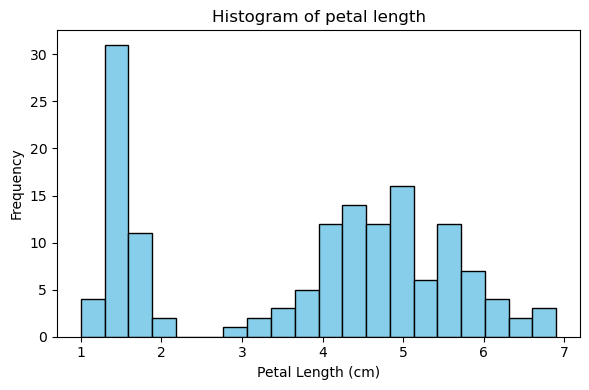

In [27]:
#Histogram petal lengths
plt.figure(figsize = (6,4))
plt.hist(df['Petal_Length'], bins=20, color='skyblue',edgecolor='black')
plt.title("Histogram of petal length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Petal_Histogram.png", dpi=300, bbox_inches='tight')
plt.show()

Step 7: Creating another histogram for petal lengths, but also color coding by species

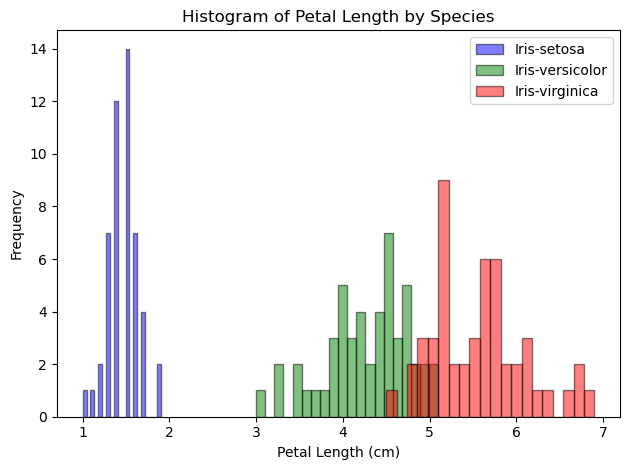

In [42]:
#Histogram petal lengths per species

colors = {'Iris-setosa':'blue', 'Iris-versicolor':'green', 'Iris-virginica':'red'}

for species, group in df.groupby('Species'):
    plt.hist(group['Petal_Length'], bins=20, alpha=0.5, label=species, color=colors[species], edgecolor='black')

plt.title("Histogram of Petal Length by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("Petal_Length_Per_Species_Histogram.png", dpi=300, bbox_inches='tight')
plt.show()

Step 8: Creating a bar chart for average sepal length by species

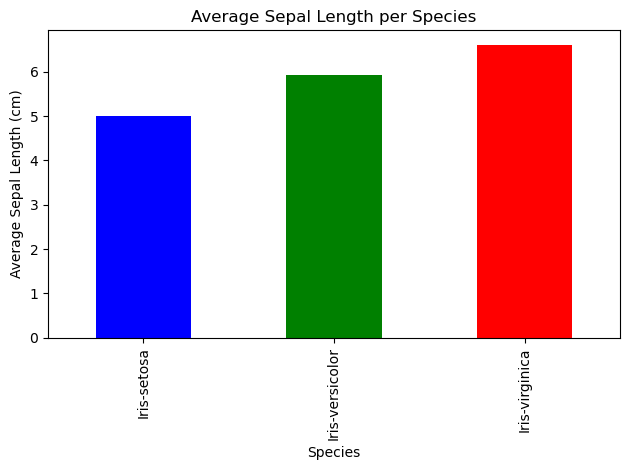

In [28]:
#Bar chart for average sepal length by species 
avg_sepal = df.groupby('Species')['Sepal_Length'].mean()
avg_sepal.plot(kind= 'bar', color=['blue', 'green', 'red'])
plt.title("Average Sepal Length per Species") 
plt.ylabel("Average Sepal Length (cm)")
plt.xlabel("Species")
plt.tight_layout()
plt.savefig("Average_Sepal_length_Barchart.png", dpi=300, bbox_inches='tight')
plt.show()

Step 9: Creating a boxplot of petal length by species

<Figure size 600x400 with 0 Axes>

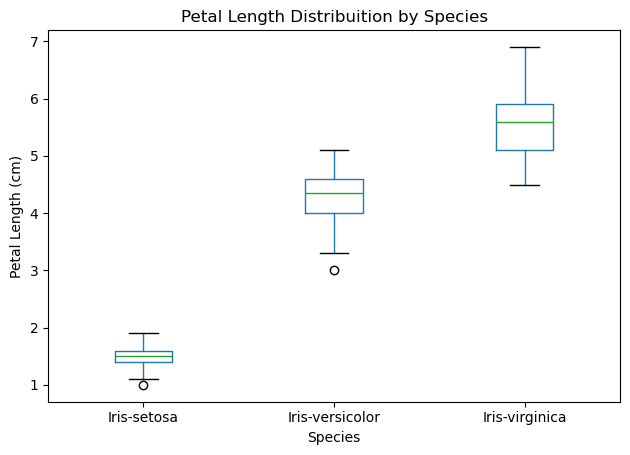

In [29]:
#Boxplot of Petal Length by Species 
plt.figure(figsize=(6,4))
df.boxplot(column= 'Petal_Length', by='Species', grid=False)
plt.title("Petal Length Distribuition by Species")
plt.suptitle("")#remove automatic title from pandas 
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.savefig("Petal_Length_Boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

Step 10: Creating a scatter plot of sepal length vs. sepal width, color coded by species

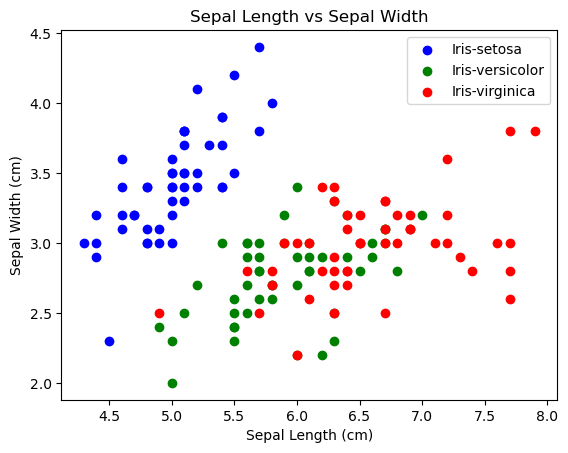

In [30]:
# Scatter plot: sepal length vs sepal width
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica' : 'red'}

for Species, color in colors.items():
    subset = df[df['Species'] == Species]
    plt.scatter(subset['Sepal_Length'], subset['Sepal_Width'], label=Species, color=color)

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.savefig("Sepal_Length_VS_Width_Scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()

Step 11: Calculating Pearson's R for the general correlation between sepal length and sepal width

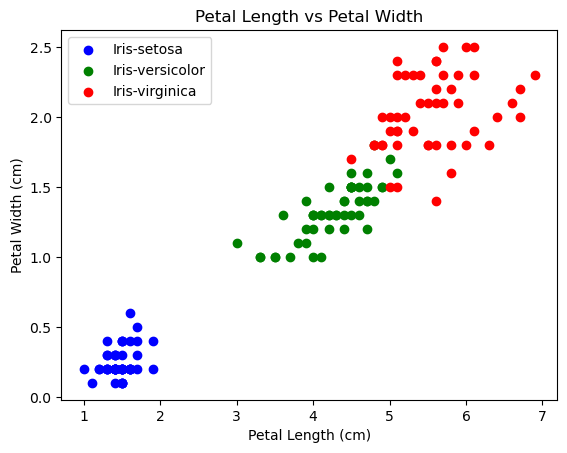

In [44]:
# Scatter plot: petal length vs petal width
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica' : 'red'}

for Species, color in colors.items():
    subset = df[df['Species'] == Species]
    plt.scatter(subset['Petal_Length'], subset['Petal_Width'], label=Species, color=color)

plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.savefig("Petal_Length_VS_Width_Scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
#Pearson's correaltion coefficient between Sepal length and Sepal width for all fowers.
correlation = df['Sepal_Length'].corr(df['Sepal_Width'])

print(f"Correlation between sepal length and sepal width: {correlation:.2f}")

Correlation between sepal length and sepal width: -0.11


Step 12: Calculating Pearson's r for each species

In [37]:
#Pearson's correaltion coefficient between Sepal length and Sepal width grouped by species .
for species, group in df.groupby('Species'):
    corr = group['Sepal_Length'].corr(group['Sepal_Width'])
    print(f"{species}: correlation = {corr:.2f}")

Iris-setosa: correlation = 0.75
Iris-versicolor: correlation = 0.53
Iris-virginica: correlation = 0.46


Step 13: Saving our new dataset (with the added column) to a new .csv file

In [22]:
# Save uodated dataset with petal categories
df.to_csv("iris_classes.csv", index=False)
print("Iris_classes.csv created successfully!")

Iris_classes.csv created successfully!


### Reflection

Key takeaways:  

- Learned to manually count categories and create new classifications based on petal length.  
- Calculated summary statistics and group-based summaries to understand patterns within each species.  
- Visualized data with histograms, bar charts, boxplots, and scatter plots to explore relationships.  
- Computed correlations to identify which features are most useful for distinguishing species